## Unidad 4: Hipótesis y Correlación
### Actividad 07

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nations.csv', encoding='latin1')

In [3]:
df = df.drop(columns="Unnamed: 0")

In [4]:
df.head()

country  region           gdp    school      adfert  chldmort  \
0       Algeria  Africa   7300.399902  6.716667    7.300000     34.75   
1         Benin  Africa   1338.800049  3.100000  111.699997    122.75   
2      Botswana  Africa  12307.400391  8.600000   52.099998     60.25   
3  Burkina Faso  Africa   1063.400024  1.300000  124.800003    170.50   
4       Burundi  Africa    349.200012  2.483333   18.600000    168.50   

        life       pop      urban  femlab   literacy   co2       gini  
0  72.316666  34172236  64.933334  0.4522  72.599998  15.0        NaN  
1  54.733334   8237634  41.000000  0.8482  41.700001   1.2        NaN  
2  52.250000   1941233  59.250000  0.8870  84.099998   9.2        NaN  
3  53.783333  15308383  23.583334  0.8584  23.600000   0.2        NaN  
4  48.866665   7821783  10.250000  1.0344  66.599998   0.1  33.299999

Según requerimiento, por mi apellido me debo enfocar en las variables ``chldmort``, ``adfert`` y ``life``

In [29]:
def sns_histogram(dataframe, variable):
    
    """
    Función que retorna histograma de la librería seaborn
    """
    
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    sns.set(style="darkgrid")
    grid = sns.FacetGrid(tmp, col = 'binarize', col_wrap=2, 
                         sharex=False, sharey=False)
    axes = grid.axes.flatten()
    axes[0].set_title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    axes[1].set_title("{0} >= {1}".format(variable, round(np.mean(hist_1), 3)))
    grid = grid.map(plt.hist, variable, color = 'dodgerblue', alpha = 0.8)
    grid.fig.set_size_inches(10,10)

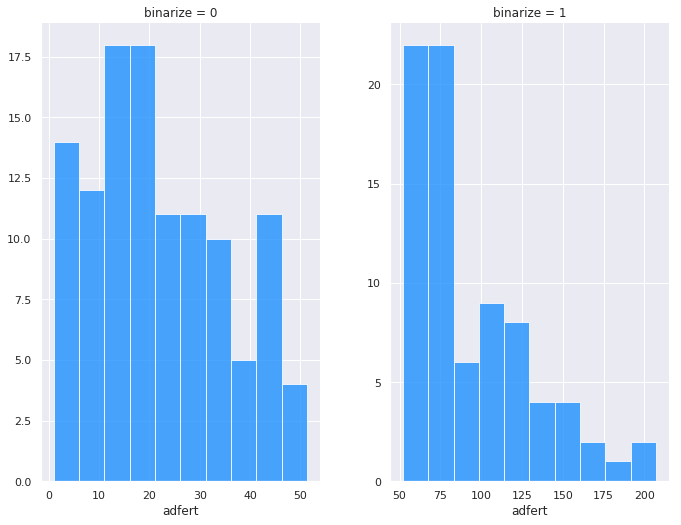

In [6]:
sns_histogram(df,'adfert')

/home/sebastiancz/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


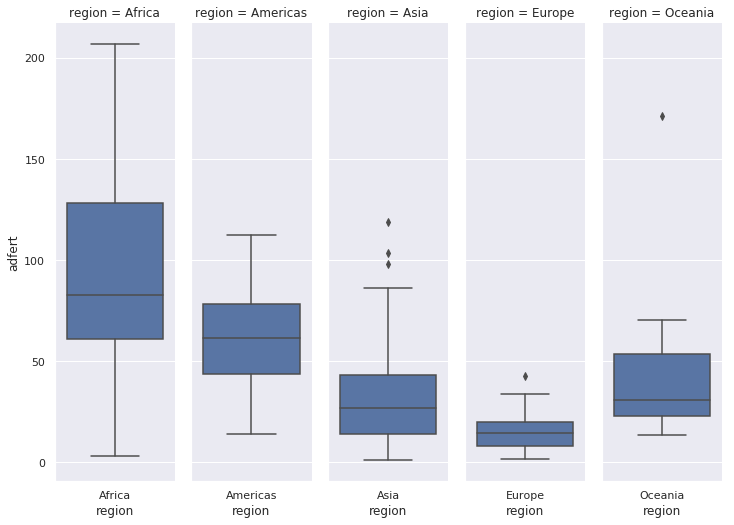

In [7]:
sns.set(style="darkgrid")
grid = sns.FacetGrid(df, col = 'region', col_wrap=5, sharey=True,sharex=False).map(sns.boxplot,'region','adfert')
grid.fig.set_size_inches(10,10)

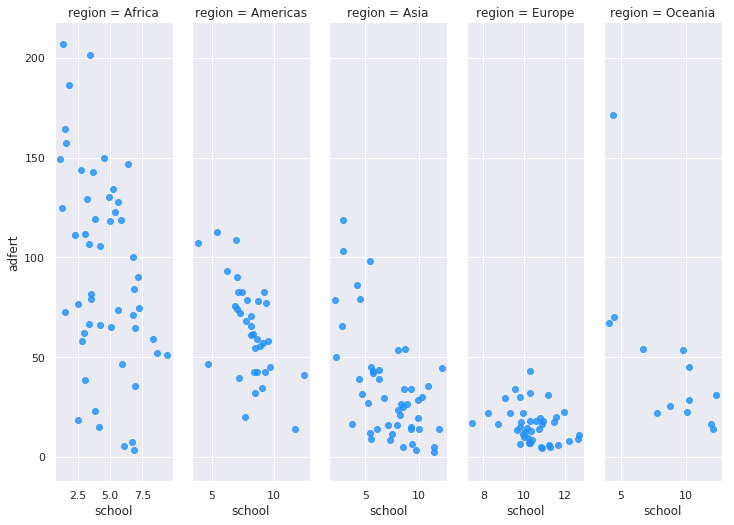

In [8]:
sns.set(style="darkgrid")
grid = sns.FacetGrid(df, col = 'region', sharey=True,sharex=False).map(sns.regplot,'school','adfert', color = 'dodgerblue', fit_reg=False)
grid.fig.set_size_inches(10,10)

In [9]:
df_corr = df.loc[:,['chldmort','adfert','life']].corr()

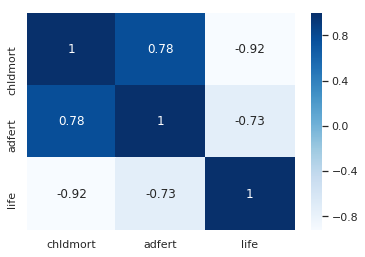

In [10]:
sns.heatmap(df_corr, cmap='Blues', annot=True);

In [23]:
df_subsample = df.loc[:,['region','chldmort','adfert','life']]

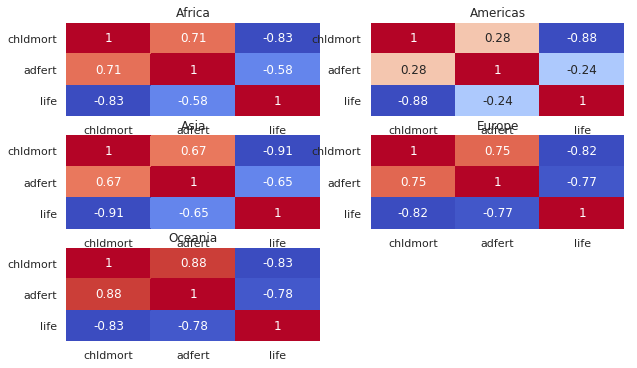

In [28]:
plt.figure(figsize = (10,10))
for index,value in enumerate (df_subsample['region'].unique()):
    tmp_corr = df_subsample[df_subsample['region'] == value].corr()
    plt.subplot(5,2, index + 1)
    plt.title(value)
    sns.heatmap(tmp_corr, cbar = False, annot = True, cmap = 'coolwarm')